In [196]:
%reload_ext autoreload
%autoreload 2

import os
from os.path import join
import math
from glob import glob

import cv2 as cv
import numpy as np
from PIL import Image, ImageDraw
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.io
from pathlib import Path

import sys
sys.path.append('/work/megapixels_dev/megapixels/')
from app.settings import app_cfg as cfg
#from app.utils import im_utils
from app.utils import file_utils

In [171]:
DATA_STORE = '/data_store_nas/'
fp_dataset = join(DATA_STORE, 'datasets/people/youtube_poses')
dir_fp_frames = join(fp_dataset, 'YouTube_Pose_dataset_1.0/GT_frames')

In [172]:
dirs_frames = glob(join(dir_fp_frames, '*'))
fps_frames = {}
for dir_frames in dirs_frames:
  fps_frames[dir_frames] = join(dir_frames, '*')

In [75]:
fp_pose_data = join(fp_dataset, 'YouTube_Pose_dataset_1.0/YouTube_Pose_dataset.mat')
pose_data = scipy.io.loadmat(fp_pose_data)['data'][0]

Data structure:
- `data[2]` = 2 x 7 x 100 array
- `data[2][0]` = x locations
- `data[2][0]` = y locations
- ordering is `Head, Right wrist, Left wrist, Right elbow, Left elbow, Right shoulder and Left shoulder`

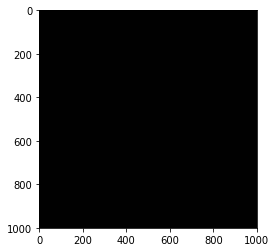

In [110]:
im = np.ones((1000,1000,3)).astype(np.uint8)
plt.imshow(im)

In [176]:
help(file_utils.zpad)

Help on function zpad in module app.utils.file_utils:

zpad(x, zeros=6)



['9WfiNi0MAwo']
/data_store_nas/datasets/people/youtube_poses/YouTube_Pose_dataset_1.0/GT_frames/9WfiNi0MAwo/frame_003211.jpg
frame id 3065
frame id 68
frame id 1097
frame id 203
frame id 270
frame id 5700
frame id 404
frame id 471
frame id 538
frame id 606
frame id 673
frame id 740
frame id 807
frame id 874
frame id 942
frame id 1009
frame id 1076
frame id 1143
frame id 1210
frame id 1277
frame id 1345
frame id 1412
frame id 1479
frame id 1546
frame id 1613
frame id 1681
frame id 1748
frame id 1815
frame id 1882
frame id 1949
frame id 2016
frame id 2084
frame id 2151
frame id 2218
frame id 2285
frame id 2352
frame id 2420
frame id 2487
frame id 2554
frame id 2621
frame id 2688
frame id 2755
frame id 2823
frame id 2890
frame id 2957
frame id 3024
frame id 3091
frame id 3159
frame id 3226
frame id 3293
frame id 3360
frame id 3427
frame id 3494
frame id 3562
frame id 3629
frame id 3696
frame id 3763
frame id 3830
frame id 3898
frame id 3965
frame id 4032
frame id 4099
frame id 4166
frame

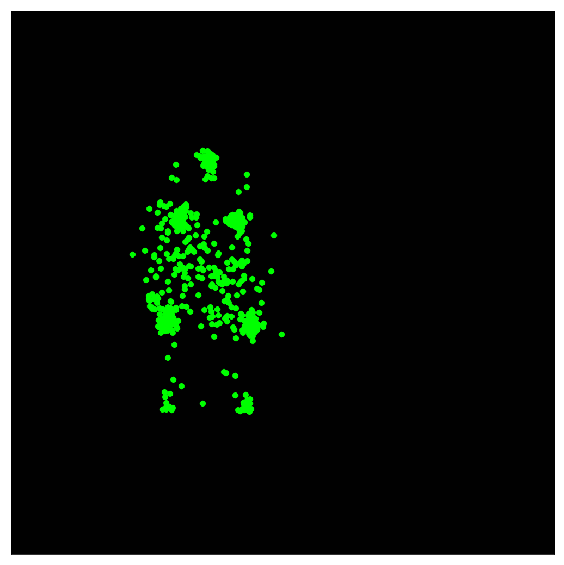

In [220]:
radius = 5
im_plt = np.ones((1000, 1000,3)).astype(np.uint8)
nwh = im.shape[:2][::-1]
colors = 

for k, pose in enumerate(pose_data[8:9]):
  print(pose[1])
  offset_ltrb = pose[6][0]
  video_scale = pose[5][0]
  video_size = pose[7][0][::-1]
  owh = pose[7][0][::-1]
  pose_pts = pose[2]
  fname = 'frame_{}.jpg'.format(file_utils.zpad(frame_id, zeros=6))
  fp_frame = join(dir_fp_frames, pose[1][0], fname)
  if not Path(fp_frame).exists():
    print('file no exist')
  im_frame = cv.imread(fp_frame)
  print(fp_frame)
  for i in range(pose_pts.shape[2]): # 100
    frame_id = pose[3][0][i]
    print('frame id', frame_id)
    for j in range(pose_pts.shape[1]): # 7
      pt_orig = np.array([pose_pts[0][j][i], pose_pts[1][j][i]])  # x,y
      pt_orig[0] -= offset_ltrb[0]
      pt_orig[1] -= offset_ltrb[1]
      imwh = im_frame.shape[:2][::-1]
      pt_norm = pt_orig / video_size
      pt_scaled_im = tuple(map(int, pt_norm * video_size))
      pt_scaled_plt = tuple(map(int, pt_norm * im_plt.shape[:2][::-1]))
      #print(pt_norm, pt_scaled)
      cv.circle(im_plt, pt_scaled_plt, radius, (4*k,255-(4*k),4*k), -1, cv.LINE_AA)
      #cv.circle(im_frame, pt_scaled_im, radius, (4*k,255-(4*k),4*k), -1, cv.LINE_AA)
  
plt.figure(figsize=(10,10))
plt.xticks([]), plt.yticks([])
plt.imshow(im_plt)

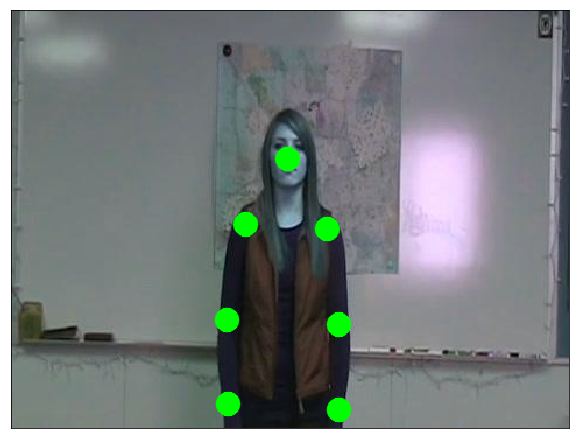

In [218]:
plt.figure(figsize=(10,10))
plt.xticks([]), plt.yticks([])
plt.imshow(im_frame)